<a href="https://colab.research.google.com/github/divypandya/OpenCV-with-Python-Course/blob/master/Image_Difference_with_Python_and_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


**To extend the SSIM approach so that we can visualize the differences between images using OpenCV and Python. Specifically, we’ll be drawing bounding boxes around regions in the two input images that differ.**


---



In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# importing the necessary packages
from skimage.measure import compare_ssim
import imutils
import cv2
import matplotlib.pyplot as plt

In [0]:
# loading the images
original_1 = cv2.imread('drive/My Drive/Colab Notebooks/CV Tutorials/images/original_01.png',1)
original_2 = cv2.imread('drive/My Drive/Colab Notebooks/CV Tutorials/images/original_02.png',1)
original_3 = cv2.imread('drive/My Drive/Colab Notebooks/CV Tutorials/images/original_03.png',1)
modified_1 = cv2.imread('drive/My Drive/Colab Notebooks/CV Tutorials/images/modified_01.png',1)
modified_2 = cv2.imread('drive/My Drive/Colab Notebooks/CV Tutorials/images/modified_02.png',1)
modified_3 = cv2.imread('drive/My Drive/Colab Notebooks/CV Tutorials/images/modified_03.png',1)

# converting loaded images into grayscale
gray_ori_1 = cv2.cvtColor(original_1, cv2.COLOR_BGR2GRAY)
gray_ori_2 = cv2.cvtColor(original_2, cv2.COLOR_BGR2GRAY)
gray_ori_3 = cv2.cvtColor(original_3, cv2.COLOR_BGR2GRAY)
gray_mod_1 = cv2.cvtColor(modified_1, cv2.COLOR_BGR2GRAY)
gray_mod_2 = cv2.cvtColor(modified_2, cv2.COLOR_BGR2GRAY)
gray_mod_3 = cv2.cvtColor(modified_3, cv2.COLOR_BGR2GRAY)

In [0]:
# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned

def SSIM(grayA, grayB):
    (score,diff) = compare_ssim(grayA, grayB, full = True)
    # The difference image is currently represented as a floating point data 
    # type in the range [0, 1] so we first convert the array to 8-bit unsigned 
    # integers in the range [0, 255] (Line 26) before we can further process 
    # it using OpenCV.
    diff = (diff*255).astype('uint8')
    print('SSIM: {}' .format(score))
    return score, diff


In [0]:
(score1, diff1) = SSIM(gray_ori_1, gray_mod_1)
(score2, diff2) = SSIM(gray_ori_2, gray_mod_2)
(score3, diff3) = SSIM(gray_ori_3, gray_mod_3)



---

**Now, let’s find the contours so that we can place rectangles around the regions identified as “different”:**


---



In [0]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
# from google.colab.patches import cv2_imshow

def BoundingBox(diff, imageA, imageB):
    thresh = cv2.threshold(diff, 0, 255,
                          cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU
                          )[1]
    
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE
                           )
    
    cnts =  imutils.grab_contours(cnts)
    
    # loop over the contours
    
    for c in cnts:
        # compute the bounding box of the contour and then draw the
	    # bounding box on both input images to represent where the two
	    # images differ
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(imageA, (x, y), (x+w, y+h), (0, 0, 255), 2)
        cv2.rectangle(imageB, (x, y), (x+w, y+h), (0, 0, 255), 2)
    
    # show original images
    fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w',
                     edgecolor='k')
    
    # show first image
    ax = fig.add_subplot(2,2,1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.title('Original Image')
    plt.axis('off')
    
    # showing modified image
    ax = fig.add_subplot(2,2,2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.title('Modified Image')
    plt.axis('off')
    
    # showing difference image
    ax = fig.add_subplot(2,2,3)
    plt.imshow(diff, cmap = plt.cm.gray)
    plt.title('Diff')
    plt.axis('off')
    
    # showing threshold image
    ax = fig.add_subplot(2,2,4)
    plt.imshow(thresh, cmap = plt.cm.gray)
    plt.title('Thresh')
    plt.axis('off')
    
    # display the images
    plt.show()
    

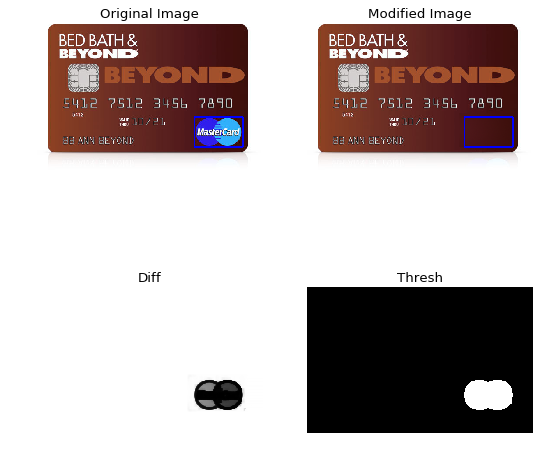

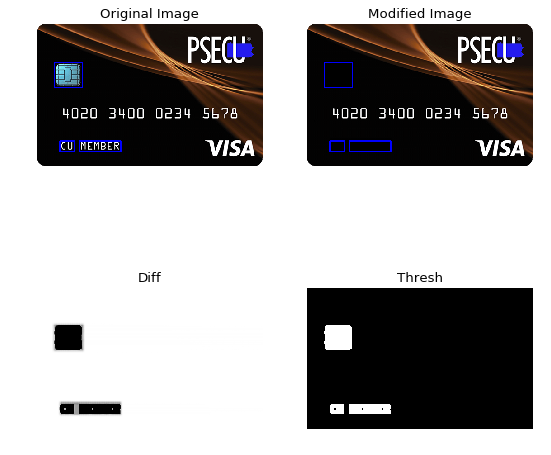

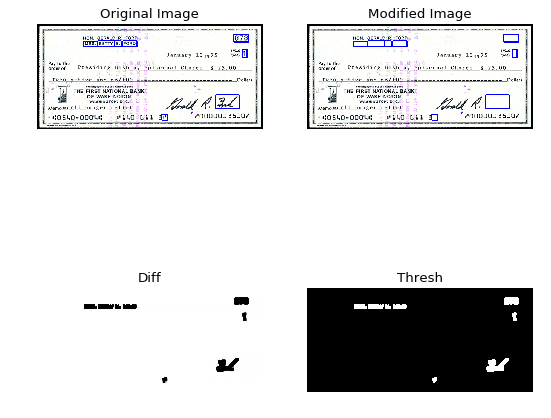

In [0]:
BoundingBox(diff1, original_1, modified_1)
BoundingBox(diff2, original_2, modified_2)
BoundingBox(diff3, original_3, modified_3)